In [4]:
import numpy
import math
import random
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

# Portfolio assignment: Calculating errors when esimating histograms

<b> To be clear, the text in bold should not be copied into your report.  This supplemental text is there to explain to you how my thinking has been structured. </b>

<b> This is an example of a portfolio assignment that would get close to full marks.  As you can see the student who wrote this has designed an investigation into something that is related to the material that was covered in the blockly exercises and videos.  The ideas in this report were not covered in those videos, however. </b>

## Statement of the problem

<b> Use this section to introduce the problem that you are working on.  You should try in this section to restate the purpose of the assignment in your own words. </b>

Through the blockly exercises I have learnt how to sample random variables and how to calculate confidence limits on the sample mean estimates that I get by computing averages in this way.  I have also learnt about how to compute histograms and how these histograms are estimates of the probability mass/density function.  I have not been shown how to estimate the error bars for these estimated probability mass/density functions, however.  For this assignment I have thus investigated how error bars on the estimates of the probability mass function can be calculated and the various implicit assumptions about the sampled data that are made when these techniques are used.

## Research

<b> Use this section to discuss the research that you did when preparing your report.  Include a list of references that you consulted and discuss the various exercises from the mathNET website that you worked through and how they shaped your understanding of the problem. </b>

Prior to writing this report I worked through the following blockly exercises:

- http://gtribello.github.io/mathNET/random-variables-exercise.html
- http://gtribello.github.io/mathNET/histograms-exercise.html

The first of these exercise taught me about how to write python programs to generate various kinds of random variables.  From second exercise I then learnt how to calculate histograms for discrete and continuous random variables.  In converting what I learnt from the blockly exercises to python I consulted the following resources:

- http://introtopython.org/lists_tuples.html
- https://matplotlib.org/users/pyplot_tutorial.html

From the first of these resources I learnt more about how to use lists in python and from the second I learnt how to use the matplotlib libraries to plot functions.

To understand how histograms are calulated through maximum likelihood estimation I consulted the following resources.

- https://en.wikipedia.org/wiki/Maximum_likelihood_estimation
- http://www.stat.ucla.edu/~hqxu/stat100B/ch8part1.pdf

Finally, in understanding how the parametric bootstrap method can be used to calculate error bars I found the following resources very useful.

- https://en.wikipedia.org/wiki/Bootstrapping
- https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading24.pdf

A summary of the theory that I learnt from these various resources is provided in the next section.

## Theory

<b> Use this section to discuss any theory that is relevant to the subject of your report. This theory should have been discovered when you performed your research.  Break your theory section into suitable subsections as I have done below.  The sections below are probably a bit more detailed than yours need to be.  This is doubly true if your project just uses the material that was covered in the blockly exercises.</b> 

###  Discrete random variables and the multinomial distribution

In statistics we use capital letters, often $X$, to denote the random outcomes of experiments performed in the future.  We often do not know what precise value these random variables will take.  Having said that, however, we often have reason to believe that the aggregate outcomes from many of these experiments will behave in a well defined and predictable way because of the law of large numbers and the central limit theorem.  We thus encode what we can predict about the aggregate value of the random variable into a cumulative probability distribution function.

To understand how this works in practise consider a discrete random variable that can take one of $k$ possible values $\{x_1, x_2, \dots, x_k\}$.  Suppose that the probability the random variable takes the value $x_j$ is then given by $p_j$.  In other words, suppose that the random variable has the following probability mass function:
$$
P(X=x_j) = \begin{cases}
p_1 & \qquad \textrm{if} \qquad x_j = x_1 \\ 
p_2 & \qquad \textrm{if} \qquad x_j = x_2 \\ 
\vdots & \\
p_k & \qquad \textrm{if} \qquad x_j = x_k \\ 
0   & \qquad \textrm{otherwise}
\end{cases}
$$
with $\sum_{i=1}^k p_i = 1$.  It is relatively straightforward to show that, if we generate $N$ such variables and if those $N$ variables are all independent and identical, the joint probability mass function for the number of times, $n_j$, each of outcomes $x_j$ occurs is given by the following multinomial distribution:
$$
P(n_1, n_2, \dots n_k )  = \frac{ N! }{ \prod_{i=1} n_i! } \prod_{i=1}^k p_i^{n_i} 
$$
with $\sum_{i=1}^k n_i = N$.

This multinomial distribution is enormously useful as the process of generating a histogram that we used in our projects on random variables can be thought of essentially as a process of taking a single sample from this joint probability distribution function. 

### Likelihood maximisation

In the previous section I introduced the multinomial distribution and discussed how we can think of the process of calculating a histogram as a process of taking a single sample from the joint probability mass function for the multinomial distribution.  In this section I will show how by thinking in this way leads we can develop a method for determining the parameters (the $p_j$ values) of the distribution.  The method we use is known as maximum likelihood.  What we, essentially, do is calculate the most likely values for the $p_j$ parameters given what we know about the values about for how often each value, $x_j$, occured in our experiment, $n_j$.  In other words, we calculate the set of $p_j$ values that maximise the likelihood function:
$$
L(p_1, p_2, \dots p_k ) = \frac{ N! }{ \prod_{i=1}^k n_i! } \prod_{i=1}^k p_i^{n_i} 
$$
subject to the constraint that $\sum_{i=1}^N p_i = 1$.  In order to make this calculation simpler we take the logarithm of the likelihood and thus optimize:
$$
\log\left[ L(p_1, p_2, \dots p_k ) \right] = \log N! - \sum_{i=1}^k \log n_i ! + \sum_{i=1}^k n_i \log p_i 
$$
Taking the logarithm makes no difference to the position of the final optimum as the logarithm is a monotonically increasing function.  To introduce the normalization constraint we use the method of Lagrange multipliers and thus introduce the additional parameter $\lambda$.  The final result is that we seek to find the unconstrained optimum of the function:
$$
\mathcal{L}(p_1, p_2, \dots p_k, \lambda ) = \log N! - \sum_{i=1}^k \log n_i ! + \sum_{i=1}^k n_i \log p_i + \lambda\left( \sum_{i=1}^k p_i - 1 \right)
$$
When we differentiate this expression with respect to $p_j$ we thus obtain:
$$
\frac{\partial L}{\partial p_j} = \frac{n_j}{p_j} + \lambda
$$
At the optimium all these partial derivatives must be equal to zero so we thus have:
$$
p_j = - \frac{n_j}{\lambda}
$$
We know, however, that $\sum_{i=1}^k p_i = 1$ and $\sum_{i=1}^k n_i = N$.  Combining this with the above allows us to thus write:
$$
\sum_{i=1}^k p_i = - \frac{1}{\lambda} \sum_{i=1}^k n_i \qquad \rightarrow \qquad 1 = -\frac{N}{\lambda} \qquad \rightarrow \qquad \lambda = - N
$$
We thus have that the optimal estimate for $p_j$ is given by:
$$
p_j = \frac{n_j}{N}
$$

### Estimating error bars

In the previous section we discussed how we can calculate the elements of a probability mass function from a set of samples from some unknown discrete probability distribution.  We have a limited sample of from our distribution, however, and we must therefore give a mesuare for the random error, $\epsilon$, in the estimate of the parameters.  In other words, we have to endeavor to quantify the degree of uncertainty in our estimate of the parameters.  We can do this by giving an confidence limit for our estimate.  In the video on the central limit theorem one way to do this was discussed.  The method in the video, however, assumed that the random variables we calculate are samples from a normal distribution.  In this report I will use a different techinque that is known as bootstrapping.  The essence of this idea is that we resample the distribution that we obtained by fitting our data.  We then refit the parameters of our distribution using the resampled data.  By repeating this procedure multiple times we can get information on the distribution of our resampled fitting parameters.  We can then compute the confidence limits from this distribution of bootstrap parameters.
  
To apply bootstrapping in the context of estimating a histogram we do the following:

- We first estimate the $p_j$ parameters for the multinomial distribution from our the samples $N$ of the unknown random variable that we were given. 
- We next use these $p_j$ parameters to generate $K$ sets of $n_j$ parameters from this multinomial distribution that was fitted in the previous step.  
- We estimate $p_j$ parameters from each of the $K$ sets of $n_j$ parameters that were estimated in the previous step using the same method as was used in the first step.
- We sort the $p_j$ parameters that were obtained from the bootstrapping.  If we have 100 bootstrap samples we can use the value of the 5th lowest of these estimates, $\theta_5$, and the 95th lowest, $\theta_{95}$ to estimate the confidence limits as $2\theta^* - \theta_5$ and $2\theta^* - \theta_{95}$, where $\theta^*$ is our original estimate for the parameter.    

If the above instructions are followed the final value values of $2\theta^* - \theta_5$ and $2\theta^* - \theta_{95}$ give us a range that a second different estimate of the sample mean will fall into 90% of the time.  

## Software

<b> Use this section to discuss the software that you have written to solve the problem. </b>

### Generating random variables

To investigate the bootstrapping method I wrote the function in the cell below.  When the second function in this cell generates is executed the random outcome from a roll of two fair dice is returned.

In [6]:
def die() :
    return random.randint(1,6)

def twodice():
    r1, r2 = die(), die()
    return r1 + r2 

Obviously, this experiment has a very simple probability mass function that I can calculate explicitly.  In the cell below I have thus written code that plots the exact probability mass function for this variable.

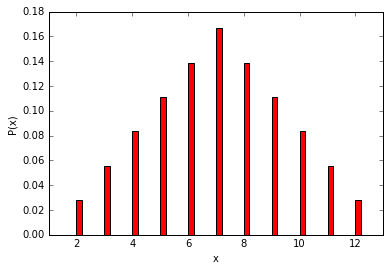

In [7]:
xvals, yvals = [2,3,4,5,6,7,8,9,10,11,12], [1./36.,2./36.,3./36.,4./36.,5./36.,6./36.,5./36.,4./36.,3./36.,2./36.,1./36.]

fig, ax = plt.subplots()
rects = ax.bar( xvals, yvals, 11*[0.2], color='r')
ax.set_xlabel("x")
ax.set_ylabel("P(x)")
ax.set_xlim(1, 13)
plt.show()

### Estimating the histogram

The cell below contains the code that generate an estimate of the histogram from a sample of 10000 variables from this distribution.  For comparison, I have plotted the estimate of the histogram obtained (blue) and the true probability mass function (red) in the graph at the end of this section of code.  As you can see the estimate obtained from the histogram obtained matches the true probability mass function reasonably well but there are some notable discrepancies due to the finite sampling.  

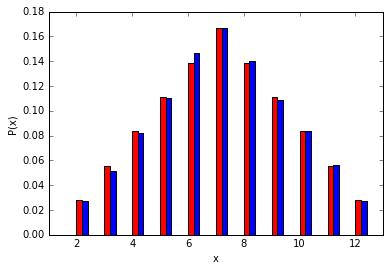

In [48]:
nsamples, xvals2, hvals =10000, [2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2,10.2,11.2,12.2], 11*[0] 

# Generate random variables and calculate how often each value comes up.
for i in range(nsamples) : 
    myrand = twodice()
    hvals[myrand-2] = hvals[myrand-2] + 1.

# Divide count of how often each value comes up by total number of samples.
for i in range(11) : hvals[i] = hvals[i] / float( nsamples )
    
# Plot histogram
fig, ax = plt.subplots()
rects0 = ax.bar( xvals, yvals, 11*[0.2], color='r')
rects1 = ax.bar( xvals2, hvals, 11*[0.2], color='b')
ax.set_xlabel("x")
ax.set_ylabel("P(x)")
ax.set_xlim(1,13)
plt.show()

### Error bars by bootstrapping

We now wish to investigate whether or not the parameters of the true probability mass function are within the 90 % confidence limit around the estimate of the probability mass function that we obtained in the previous section.  To do so we have use the bootstrapping method that was discussed in the theory section.  The first step in this process is to write some code to generate random variables from the multinomial distribution that we fitted when we calculated our histogram.  The code to do this is in the cell below:

In [49]:
# Generate one independent discrete random variable
def gen_drand( p ) :  # p is list containing parameters of random variable
    n, cumul, frand = 0, 0, numpy.random.uniform(0,1)
    for prob in p :   # Notice that we can iterate over elements of a list like this
        cumul = cumul + prob
        if frand < cumul : return n
        n = n + 1
        
# Generate multinomial random variable from nsamples trials using hvals
def gen_multinomial() : 
    multinom = 11*[0]
    for i in range(nsamples) :
        frand = gen_drand( hvals )
        multinom[frand] = multinom[frand] + 1
    
    for i in range(11) : multinom[i] = multinom[i] / nsamples
    return multinom

We now generate 100 bootstrap samples of the parameters for our histogram using the multinomial distribution that was fitted in the previous section.  

In [56]:
# Create 11 lists containing the 100 bootstrap samples for our histogram
bootstrapps = []
for i in range(100) : 
    bootstrapps.append( gen_multinomial() )

boots = numpy.array( bootstrapps )
# Now sort our 11 lists into order and get the 90 % confidence limits
lower, upper = 11*[0], 11*[0]
for j in range(11) :
    sorted_boots = numpy.sort( boots[:,j] )
    lower[j] = sorted_boots[4] - hvals[j]
    upper[j] = hvals[j] - sorted_boots[94]

We now plot our estimate of the histogram (blue) with the confidence limits that have been calculated using our bootstrap and the true probability mass function (red) on the same axis.  It is clear from the figure that the true values for the probabilities for most of our histogram bars are within the 90% confidence limit that we obtained by bootstrapping.  We would perhaps not expect all our estimates to be within the 90% confidence limit as we have generated 11 parameters and are only giving a 90 % confidence limit. 

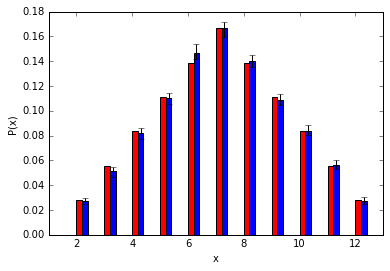

In [57]:
# Plot histogram with confidence limits
fig, ax = plt.subplots()
rects0 = ax.bar( xvals, yvals, 11*[0.2], color='r')
rects1 = ax.bar( xvals2, hvals, 11*[0.2], yerr=[lower,upper], ecolor='k', color='b')
ax.set_xlabel("x")
ax.set_ylabel("P(x)")
ax.set_xlim(1,13)
plt.show()

## Further considerations and extensions

<b> Use this section to discuss the assumptions in your approach and the limitations of your approach </b>

The data that I generated to demonstrate the bootstrap technique and the process of calculating a histogram consisted of a set of identically distribution and independent random variables.  

The procedure described above cannot be used if the data is generated from a Markov chain.  The problem for this type of data is that the value of the random variable at time $t$ is correlated with the value the random variable has at time $t-1$.  At the same time, however, I know that, if my chain is ergodic, and if I take a sample over a long simulation the fraction of time spent in each state should be equal to one over the expected return time to that state.  In other words, the system will spend a fixed fraction of time in each of the states.  I thus should be able to estimate a histogram by simply running my Markov chain for a sufficiently long period of time.  

The problem with estimating the histogram from a simulation of a Markov chain is the estimation of the errors.  To also calculate error bars one needs to generate decorrelated samples.  In practise one can obtain decorrelated samples by resampling, by taking every $M$th point generated in the chain or by calculating block averages.  To determine how large $M$ should be or how long the blocks should be you must calculate the autocorrelation function, however, and this is beyond the scope of this report.    